# Deliverable 2

## Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Visit the website
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
URL  = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(URL)
html = browser.html
sp   = soup(html,"html.parser")
print(sp.prettify())
browser.quit()

In [4]:
# Create a Beautiful Soup Object
table = sp.find('table', class_ = 'table')
# table = tbl_section.find('div', class_ = )
tbody = table.find('tbody')

In [5]:
# Extract all rows of data
header = []
for column in tbody.find('tr').find_all('th'):
    header.append(column.text)

body = tbody.find_all('tr')
table = body[1:]


In [ ]:
table_content = []
for row in table:
    row_items = []
    for td in row.find_all('td'):
        row_items.append(td.text)
    table_content.append(row_items)


table_content

In [25]:
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []
for row in table_content:
    id.append(row[0])
    terrestrial_date.append(row[1])
    sol.append(row[2])
    ls.append(row[3])
    month.append(row[4])
    min_temp.append(row[5])
    pressure.append(row[6])

mars_df = pd.DataFrame({
    'id': id,
    'terrestrial_date': terrestrial_date, 
    'sol': sol, 
    'ls': ls,
    'month': month,
    'min_temp': min_temp,
    'pressure': pressure
})



In [27]:
# Examine data type of each column

datatypes = {'terrestrial_date':'datetime64[ns]',
'sol': 'int64',
'ls' : 'int64',
'month':'int64',
'min_temp' : 'float64',
'pressure':'float64'}


In [28]:
# Change data types for data analysis

for k, v in datatypes.items():
    mars_df[k] = mars_df[k].astype(v)


## Mars Data Analysis

1. How many months exist on Mars?

In [29]:
mars_df.loc[mars_df['month'] == max(mars_df['month'])].head(1)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
248,263,2013-06-05,295,330,12,-71.0,853.0


2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [20]:
mars_df.loc[mars_df['sol'] == max(mars_df['sol'])]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


3. What is the average low temperature by month?

In [35]:
month_temps = mars_df.groupby(by = 'month')['min_temp'].mean()
month_temps = month_temps.reset_index(name='temps')
month_temps

,month,temps
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


<AxesSubplot: title={'center': 'Average Tempurature by Month'}, xlabel='month'>

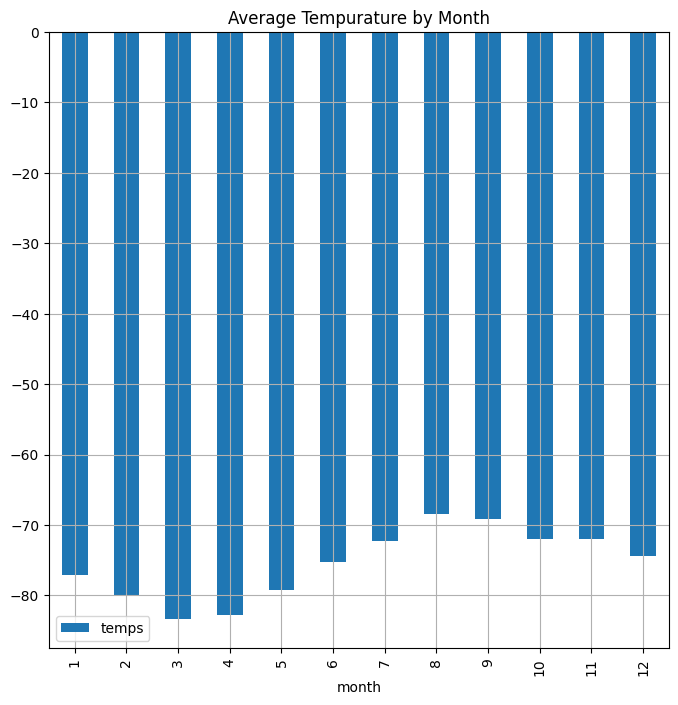

In [37]:
# Plot the average temperature by month
month_temps.plot(kind="bar", y="temps", x="month", grid=True, figsize=(8,8),
              title="Average Tempurature by Month")

4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:

In [38]:
month_pressure = mars_df.groupby(by = 'month')['pressure'].mean()
month_pressure = month_pressure.reset_index(name='pressure')
month_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


<AxesSubplot: title={'center': 'Average Pressure by Month'}, xlabel='month'>

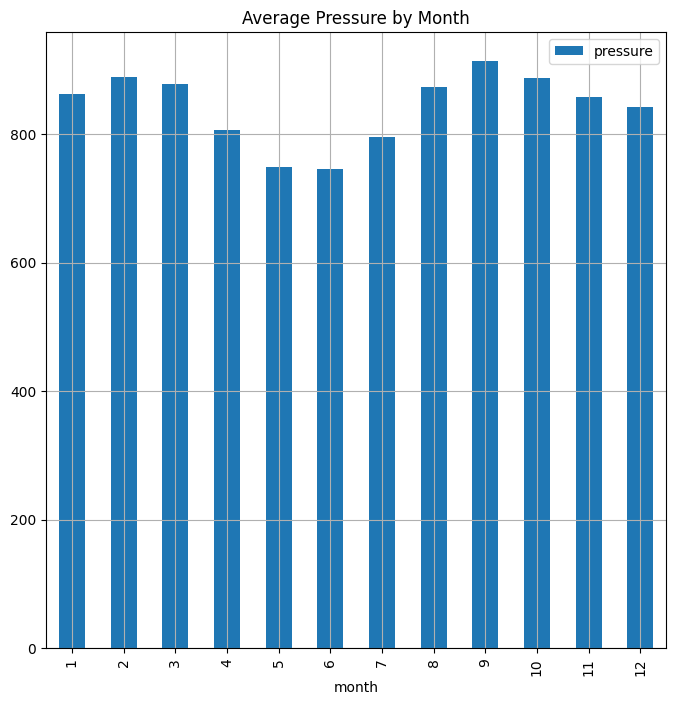

In [39]:
month_pressure.plot(kind="bar", y="pressure", x="month", grid=True, figsize=(8,8),
              title="Average Pressure by Month")

5. About how many terrestrial (Earth) days exist in a Martian year?

In [49]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_yr = mars_df.query("terrestrial_date	>= '2013-08-01' or terrestrial_date <= '2015-06-18'")
mars_yr.shape[0]

1867

<AxesSubplot: title={'center': 'Daily (Terrestrial) Minimum Temperature for Martian Year'}>

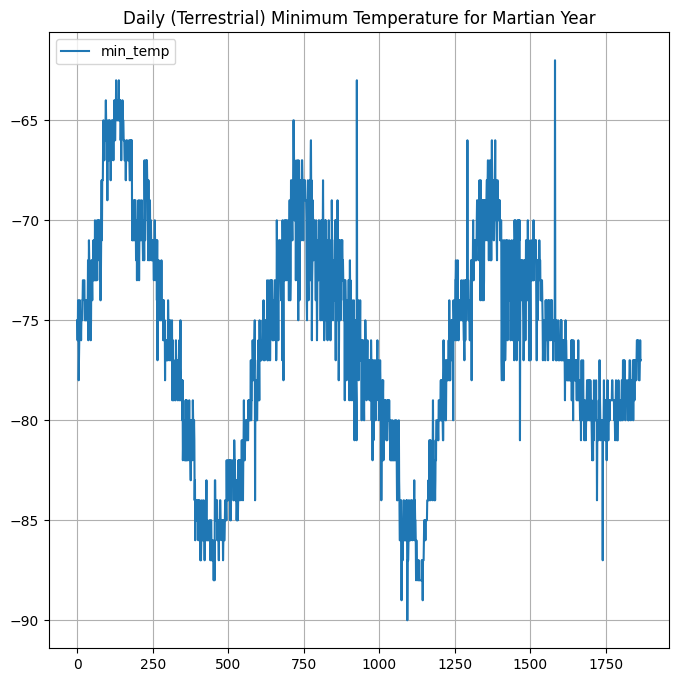

In [53]:
mars_yr.plot(y="min_temp", grid=True, figsize=(8,8),
              title="Daily (Terrestrial) Minimum Temperature for Martian Year")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [32]:
# Write the data to a CSV
mars_df.to_csv("mars.csv")